In [27]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Data Loading

In [28]:
with open('/Users/benschlagman/Desktop/Sports-Betting-Research-Repo/in_play/ladders.json', 'r') as file:
    ladders = json.load(file)

In [73]:
def get_prices_and_ltp(runner_data):
    best_back = runner_data.get('atb', [])[0][0] if runner_data.get('atb') else None
    best_lay = runner_data.get('atl', [])[0][0] if runner_data.get('atl') else None
    ltp = runner_data.get('ltp', None)
    ttrdv = runner_data.get('ttrdv', None)
    return best_back, best_lay, ltp, ttrdv

# def get_prices_and_ltp(runner_data):
#     best_back = sum([item[1] for item in runner_data.get('atb', [])]) if runner_data.get('atb') else None
#     best_lay = sum([item[1] for item in runner_data.get('atl', [])]) if runner_data.get('atl') else None
#     ltp = runner_data.get('ltp', None)
#     ttrdv = runner_data.get('ttrdv', None)
    
#     return best_back, best_lay, ltp, ttrdv


extracted_data = []
current_inPlay = None
id = ladders[0].get('metadata', None)

for update in ladders:
    pt = update['pt']
    runner_keys = list(update['runners'].keys())
    if 'marketDefinition' in update:
        current_inPlay = update['marketDefinition'].get('inPlay', None)

    runner1_best_back, runner1_best_lay, runner1_ltp, runner1_ttrdv = get_prices_and_ltp(update['runners'][runner_keys[0]])
    runner2_best_back, runner2_best_lay, runner2_ltp, runner2_ttrdv = get_prices_and_ltp(update['runners'][runner_keys[1]])
    runner3_best_back, runner3_best_lay, runner3_ltp, runner3_ttrdv = get_prices_and_ltp(update['runners'][runner_keys[2]])

    extracted_data.append({
        'pt': pt,
        'id': id,
        'runner1_best_back': runner1_best_back,
        'runner1_best_lay': runner1_best_lay,
        'runner1_ltp': runner1_ltp,
        'runner1_ttrdv': runner1_ttrdv,
        'runner2_best_back': runner2_best_back,
        'runner2_best_lay': runner2_best_lay,
        'runner2_ltp': runner2_ltp,
        'runner2_ttrdv': runner2_ttrdv,
        'runner3_best_back': runner3_best_back,
        'runner3_best_lay': runner3_best_lay,
        'runner3_ltp': runner3_ltp,
        'runner3_ttrdv': runner3_ttrdv,
        'inPlay': current_inPlay

    })

    # Create a DataFrame for this match and add it to the list
df_match = pd.DataFrame(extracted_data)
# df_match = df_match[df_match['inPlay'] == True]


In [74]:
# Define the date and time range
start_time = pd.to_datetime('2023-01-01 13:30')
end_time = pd.to_datetime('2023-01-01 15:35')

# Filter the DataFrame for the specified time range
df_match['pt'] = pd.to_datetime(df_match['pt'], errors='coerce')

filtered_df = df_match[(df_match['pt'] >= start_time) & (df_match['pt'] <= end_time)]
filtered_df

,pt,id,runner1_best_back,runner1_best_lay,runner1_ltp,runner1_ttrdv,runner2_best_back,runner2_best_lay,runner2_ltp,runner2_ttrdv,runner3_best_back,runner3_best_lay,runner3_ltp,runner3_ttrdv,inPlay
22399,2023-01-01 13:30:00.381,1.207324870,1.72,1.73,1.72,708872.64,5.40,5.50,5.40,91173.02,4.1,4.2,4.2,63454.67,False
22400,2023-01-01 13:30:00.740,1.207324870,1.72,1.73,1.72,708872.64,5.40,5.50,5.50,91189.02,4.1,4.2,4.2,63454.67,False
22401,2023-01-01 13:30:00.946,1.207324870,1.72,1.73,1.72,708872.64,5.40,5.50,5.50,91189.02,4.1,4.2,4.2,63454.67,False
22402,2023-01-01 13:30:01.055,1.207324870,1.72,1.73,1.72,708872.64,5.40,5.50,5.50,91189.02,4.1,4.2,4.2,63454.67,False
22403,2023-01-01 13:30:01.449,1.207324870,1.72,1.73,1.72,708872.64,5.40,5.50,5.50,91189.02,4.1,4.2,4.2,63454.67,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63791,2023-01-01 15:34:59.227,1.207324870,75.00,80.00,80.00,2135522.19,1.06,1.08,1.08,1011557.38,16.5,17.0,17.0,234973.07,True
63792,2023-01-01 15:34:59.345,1.207324870,75.00,80.00,80.00,2135522.19,1.06,1.08,1.08,1011557.38,16.5,17.0,16.5,234977.07,True
63793,2023-01-01 15:34:59.456,1.207324870,75.00,80.00,80.00,2135522.19,1.06,1.08,1.08,1011564.40,16.5,17.0,16.5,234977.07,True
63794,2023-01-01 15:34:59.555,1.207324870,75.00,80.00,80.00,2135522.19,1.06,1.08,1.08,1011564.47,16.5,17.0,16.5,234977.07,True


# Plotting code

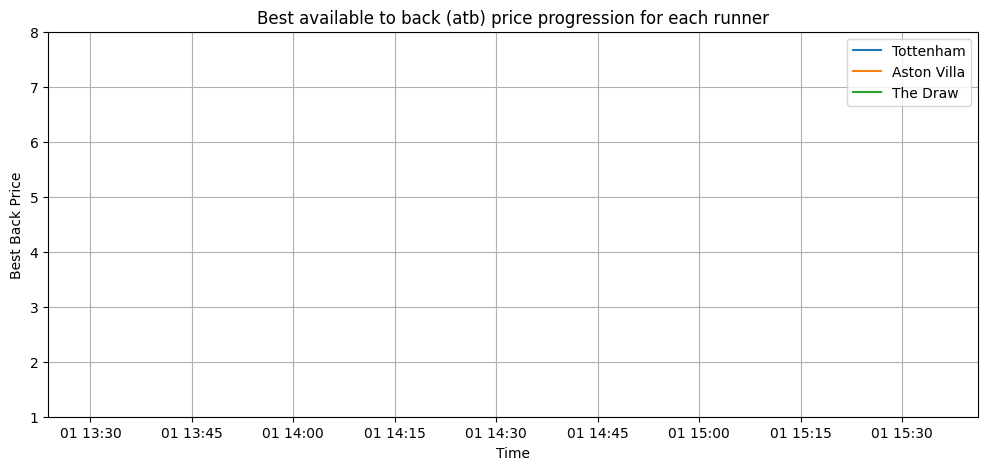

In [60]:

# Plotting the best back prices for Runner 2 over time
plt.figure(figsize=(12, 5))

plt.plot(filtered_df['pt'], filtered_df['runner1_best_back'], label='Tottenham')
plt.plot(filtered_df['pt'], filtered_df['runner2_best_back'], label='Aston Villa')
plt.plot(filtered_df['pt'], filtered_df['runner3_best_back'], label='The Draw')
# Adding titles and labels
plt.title('Best available to back (atb) price progression for each runner')
plt.xlabel('Time')
plt.ylabel('Best Back Price')
plt.ylim(1, 8)  # Set the y-axis limits from 1 to 8
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

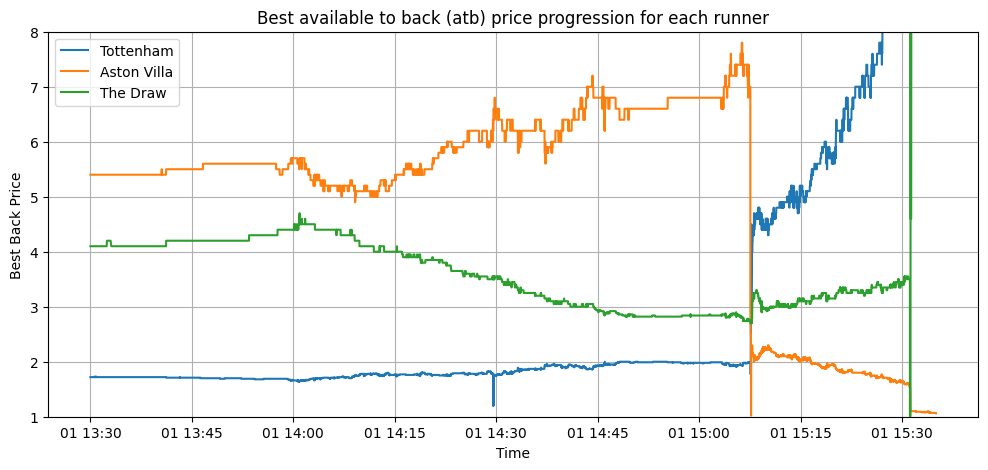

In [67]:
import matplotlib.pyplot as plt

# Creating a figure and axis using subplots
fig, ax = plt.subplots(figsize=(12, 5))

# Plotting the best back prices for each runner
ax.plot(filtered_df['pt'], filtered_df['runner1_best_back'], label='Tottenham')
ax.plot(filtered_df['pt'], filtered_df['runner2_best_back'], label='Aston Villa')
ax.plot(filtered_df['pt'], filtered_df['runner3_best_back'], label='The Draw')

# Adding titles and labels
ax.set_title('Best available to back (atb) price progression for each runner')
ax.set_xlabel('Time')
ax.set_ylabel('Best Back Price')
ax.set_ylim(1, 8)  # Set the y-axis limits from 1 to 8

# Adding legend and grid
ax.legend()
ax.grid(True)

# Display the plot
plt.show()


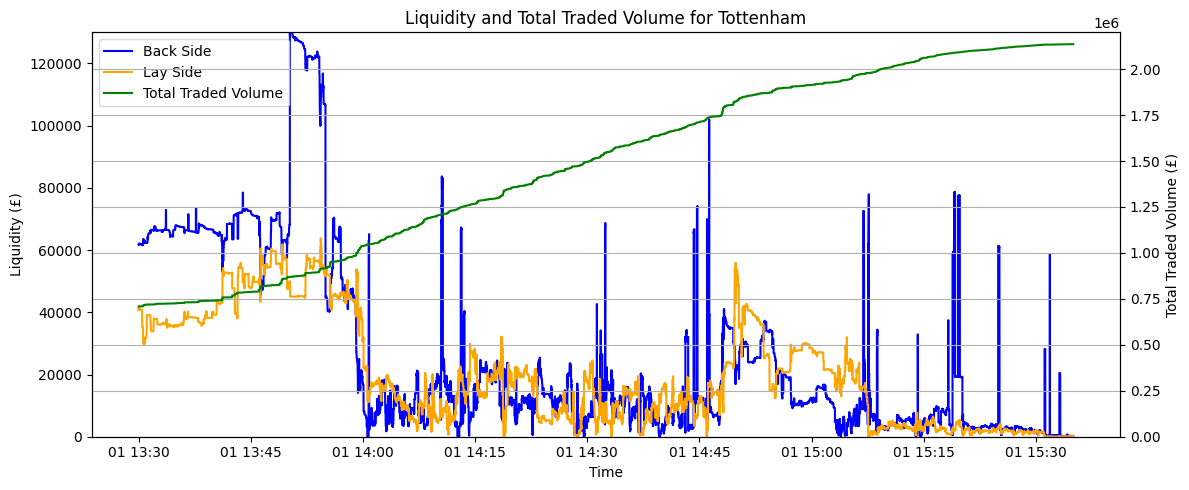

In [71]:
import matplotlib.pyplot as plt

# Plotting the Liquidity and Total Traded Volume
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plotting Liquidity (Back Side and Lay Side) on the left y-axis
ax1.set_xlabel('Time')
ax1.set_ylabel('Liquidity (£)', color='black')
ax1.plot(filtered_df['pt'], filtered_df['runner1_best_back'], label='Back Side', color='blue')
ax1.plot(filtered_df['pt'], filtered_df['runner1_best_lay'], label='Lay Side', color='orange')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, 130000)  # Set the y-axis limits for Liquidity

# Creating a second y-axis for Total Traded Volume
ax2 = ax1.twinx()
ax2.set_ylabel('Total Traded Volume (£)', color='black')
ax2.plot(filtered_df['pt'], filtered_df['runner1_ttrdv'], label='Total Traded Volume', color='green')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, 2200000)  # Set the y-axis limits for Total Traded Volume

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Adding title and grid
plt.title('Liquidity and Total Traded Volume for Tottenham')
fig.tight_layout()
plt.grid(True)

# Display the plot
plt.show()


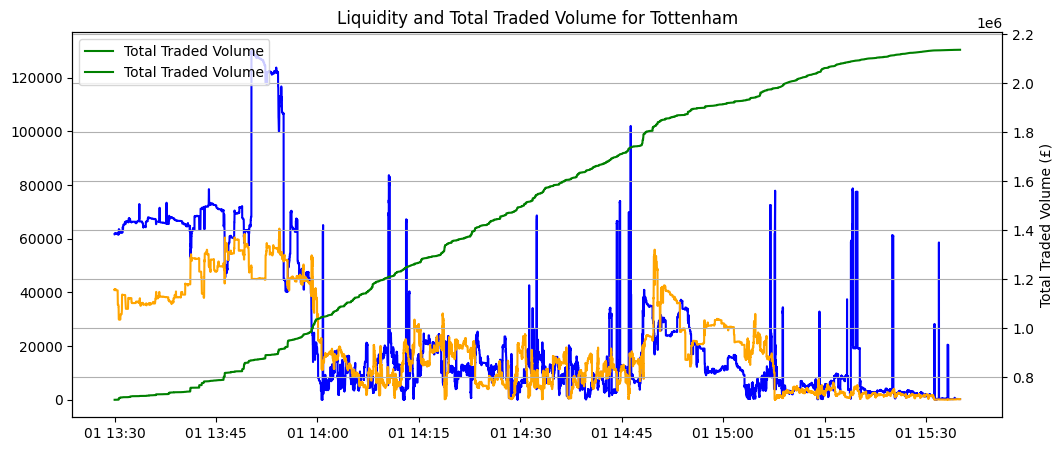

In [70]:
import matplotlib.pyplot as plt

# Creating the figure
plt.figure(figsize=(12, 5))

# Plotting Liquidity (Back Side and Lay Side)
plt.plot(filtered_df['pt'], filtered_df['runner1_best_back'], label='Back Side', color='blue')
plt.plot(filtered_df['pt'], filtered_df['runner1_best_lay'], label='Lay Side', color='orange')

# Adding Total Traded Volume to the secondary y-axis
ax2 = plt.gca().twinx()  # Get current axis and create twin
ax2.plot(filtered_df['pt'], filtered_df['runner1_ttrdv'], label='Total Traded Volume', color='green')

# Adding titles and labels
plt.title('Liquidity and Total Traded Volume for Tottenham')
plt.xlabel('Time')
plt.ylabel('Liquidity (£)')
ax2.set_ylabel('Total Traded Volume (£)')

# Adding legends for both y-axes
fig = plt.gcf()
lines1, labels1 = plt.gca().get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Adding grid
plt.grid(True)

# Display the plot
plt.show()


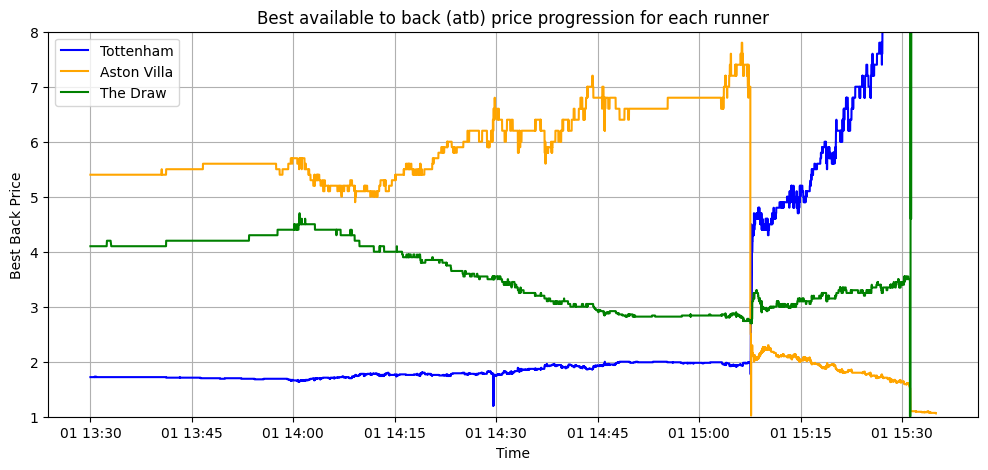

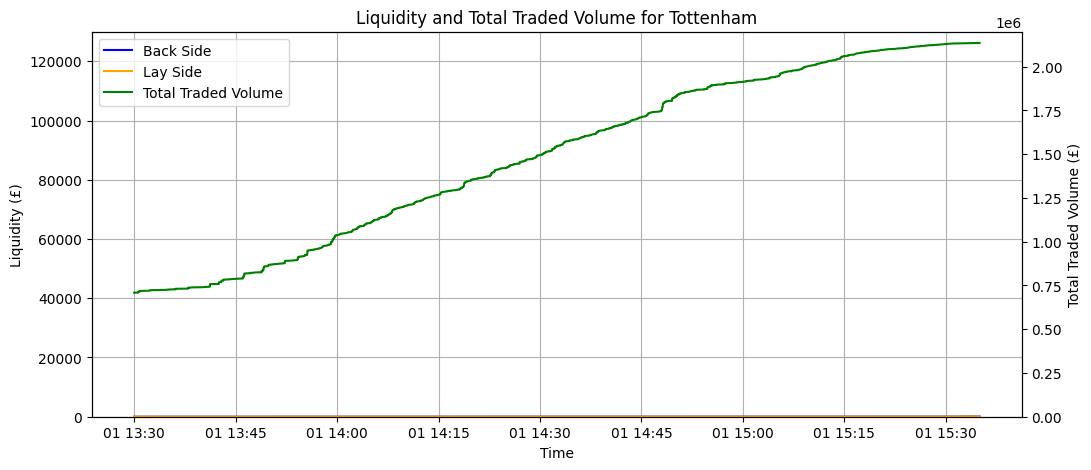

In [75]:
import matplotlib.pyplot as plt

# Plotting the best back prices for Runner 2 over time
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plotting the best back prices for each runner with consistent styling
ax1.plot(filtered_df['pt'], filtered_df['runner1_best_back'], label='Tottenham', color='blue', linestyle='-', marker=None)
ax1.plot(filtered_df['pt'], filtered_df['runner2_best_back'], label='Aston Villa', color='orange', linestyle='-', marker=None)
ax1.plot(filtered_df['pt'], filtered_df['runner3_best_back'], label='The Draw', color='green', linestyle='-', marker=None)

# Adding titles and labels
ax1.set_title('Best available to back (atb) price progression for each runner')
ax1.set_xlabel('Time')
ax1.set_ylabel('Best Back Price')
ax1.set_ylim(1, 8)  # Set the y-axis limits from 1 to 8

# Adding legend and grid
ax1.legend()
ax1.grid(True)

# Display the plot
plt.show()


# Plotting the Liquidity and Total Traded Volume
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plotting Liquidity (Back Side and Lay Side) with consistent styling
ax1.plot(filtered_df['pt'], filtered_df['runner1_best_back'], label='Back Side', color='blue', linestyle='-', marker=None)
ax1.plot(filtered_df['pt'], filtered_df['runner1_best_lay'], label='Lay Side', color='orange', linestyle='-', marker=None)

# Set labels and limits
ax1.set_xlabel('Time')
ax1.set_ylabel('Liquidity (£)', color='black')
ax1.set_ylim(0, 130000)  # Set the y-axis limits for Liquidity

# Creating a second y-axis for Total Traded Volume with consistent styling
ax2 = ax1.twinx()
ax2.plot(filtered_df['pt'], filtered_df['runner1_ttrdv'], label='Total Traded Volume', color='green', linestyle='-', marker=None)
ax2.set_ylabel('Total Traded Volume (£)', color='black')
ax2.set_ylim(0, 2200000)  # Set the y-axis limits for Total Traded Volume

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Adding title and grid
ax1.set_title('Liquidity and Total Traded Volume for Tottenham')
ax1.grid(True)

# Display the plot
plt.show()
